### Hair_dryer | ขนาด ??? |                                          
##### TYPE 2 " TURN ON EVERYDAY//ONCE TIME


## NO. 11 (ไดร์ฟเป่าผม)
* **เปิดเบอร์ 2 จากทั้งหมด 4 เบอร์ (เบอร์ 1 มีลมอย่างเดียวไม่ร้อน)**
![image](https://raw.githubusercontent.com/skyfighter/iHEMS/master/Device/pic/hairdryers.png)

In [4]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 31
time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

####### set databases to empty #########
query_empty = """truncate table device.hair_dryer""" 
c.execute(query_empty)
print "device.elec_thermos are Empty!!! \n"

query = "SELECT watt FROM collected_info.11_hair_dryer WHERE no >= '%s'   AND no <= '%s'; "% (0,1200)
df = pd.read_sql(query, conn)
# print df.watt[5]

#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour1 = ['21'] * 40 + ['22'] *45 + ['23'] * 15
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(30, 59)
    duration_hour1 = ['0'] * 50 + ['1'] * 1+ ['0'] * 49
    duration_hour = random.choice(duration_hour1)   
    seconds = (int(duration_hour)*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item

days = 0
j = 0
i = 0
print "\nDays :",days ,":",time_b[j].strftime('%a')
off_item = rand_turnon()  
no_item = rand_duration()  

while (j <= (5760*d)-1):  
    c.execute("INSERT INTO device.hair_dryer (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
    conn.commit()
    j += 1 
    
    while (off_item+(5760*(days)) <= j <= (no_item+off_item)+(5760*(days))):                   
        c.execute("INSERT INTO device.hair_dryer (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
        conn.commit()
        i += 1 
        j += 1
        if (j == (no_item+off_item)+(5760*(days))):
            days +=1
            print "\nDays :",days ,":",time_b[j].strftime('%a')
            off_item = rand_turnon()  
            no_item = rand_duration() 
            i= 0   

                    
print "DONE!"


device.elec_thermos are Empty!!! 


Days : 0 : Thu
time to turn-on appliacne on 22 : 9 : 18 equal to 5317 items
consuming the appliance 0 hours 47 minutes 9 seconds that equal to 2829 seconds or 188 items

Days : 1 : Thu
time to turn-on appliacne on 22 : 15 : 2 equal to 5340 items
consuming the appliance 0 hours 54 minutes 18 seconds that equal to 3258 seconds or 217 items

Days : 2 : Fri
time to turn-on appliacne on 23 : 9 : 17 equal to 5557 items
consuming the appliance 0 hours 37 minutes 14 seconds that equal to 2234 seconds or 148 items

Days : 3 : Sat
time to turn-on appliacne on 23 : 37 : 48 equal to 5671 items
consuming the appliance 0 hours 30 minutes 51 seconds that equal to 1851 seconds or 123 items

Days : 4 : Mon
time to turn-on appliacne on 22 : 46 : 35 equal to 5466 items
consuming the appliance 0 hours 57 minutes 12 seconds that equal to 3432 seconds or 228 items

Days : 5 : Mon
time to turn-on appliacne on 21 : 33 : 38 equal to 5174 items
consuming the appliance 0 hours

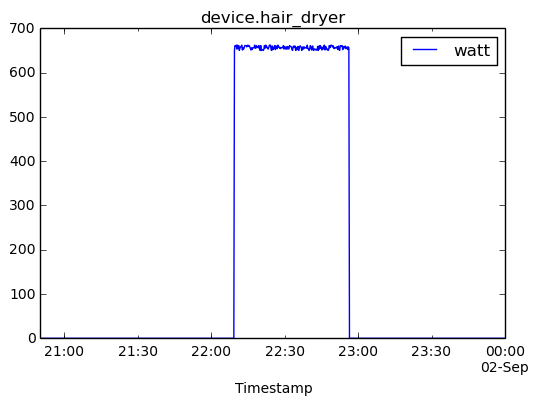

In [10]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM device.hair_dryer WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[5000],time_b[5760])
df = pd.read_sql(query, conn, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('device.hair_dryer')
df.plot(ax=ax )
plt.show()